In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.donwload('wordnet')

train = pd.read_csv('IMDB/train.csv')
val = pd.read_csv('IMDB/val.csv')
test = pd.read_csv('IMDB/test.csv')

xtrain = train.loc[:,['text']]
ytrain = train.loc[:,['label']]
xtest = test.loc[:,['text']]
ytest = test.loc[:['label']]
xval = val.loc[:,['text']]
yval = val.loc[:['label']]

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+','',text)
    text = re.sub(r'[^a-zA-Z\s]','',text)
    text = re.sub(r"\w\s", '', text)
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(w) for w in words if w is not in stop_words]
    return ' '.join(words)

x_train_clean = xtrain.map(clean_text)
xval_clean = xval.map(clean_text)


import pandas as pd
from sklearn.model_selection import train_test_split

# 1️⃣ Load all CSV files
df1 = pd.read_csv('data1.csv')
df2 = pd.read_csv('data2.csv')
df3 = pd.read_csv('data3.csv')

# 2️⃣ Combine all datasets (stack vertically)
df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
print(f"✅ Total samples after merging: {len(df)}")

# Optional: shuffle once before splitting (though train_test_split also shuffles)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# 3️⃣ Split into features (X) and target (y)
X = df['text']
y = df['label']

# 4️⃣ Split into Train (70%), Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y
)

# 5️⃣ Split Temp into Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True, stratify=y_temp
)

# 6️⃣ Check sizes
print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")

# 7️⃣ (Optional) Save to new CSVs
train_df = pd.DataFrame({'text': X_train, 'label': y_train})
val_df = pd.DataFrame({'text': X_val, 'label': y_val})
test_df = pd.DataFrame({'text': X_test, 'label': y_test})

train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)
test_df.to_csv('test.csv', index=False)

print("✅ Data successfully split and saved as train.csv, val.csv, test.csv")


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist, bigrams
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

2025-09-28 06:13:06.943283: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-28 06:13:06.985158: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-28 06:13:07.958034: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/razerash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/razerash/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/razerash/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
train=pd.read_csv('IMDB/Train.csv')
val=pd.read_csv('IMDB/Valid.csv')
test=pd.read_csv('IMDB/Test.csv')

In [4]:
xtrain=train.loc[:,['text']]
ytrain=train.loc[:,['label']]
xtest=test.loc[:,['text']]
ytest=test.loc[:,['label']]
xval=val.loc[:,['text']]
yval=val.loc[:,['label']]

In [5]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)  
    text = re.sub(r'[^a-zA-Z\s]', '', text)    
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words] //reducing it to base form like running to run
    return ' '.join(words)

xtrain_clean = xtrain.map(clean_text)
xval_clean = xval.map(clean_text)


In [6]:
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(xtrain_clean.text)

xtrain_seq = tokenizer.texts_to_sequences(xtrain_clean.text)
xval_seq = tokenizer.texts_to_sequences(xval_clean.text)

xtrain_pad = pad_sequences(xtrain_seq, maxlen=max_len, padding='post')
xval_pad = pad_sequences(xval_seq, maxlen=max_len, padding='post')


# counter took too long switched to FreqDist

[(('br', 'br'), 11357), (('look', 'like'), 2343), (('br', 'film'), 2184), (('br', 'movie'), 2177), (('ever', 'seen'), 2034), (('ive', 'seen'), 1783), (('special', 'effect'), 1764), (('dont', 'know'), 1633), (('itbr', 'br'), 1600), (('even', 'though'), 1560), (('main', 'character'), 1519), (('one', 'best'), 1503), (('movie', 'like'), 1388), (('year', 'old'), 1371), (('moviebr', 'br'), 1367), (('br', 'one'), 1290), (('filmbr', 'br'), 1268), (('movie', 'ever'), 1222), (('see', 'movie'), 1216), (('horror', 'movie'), 1216)]


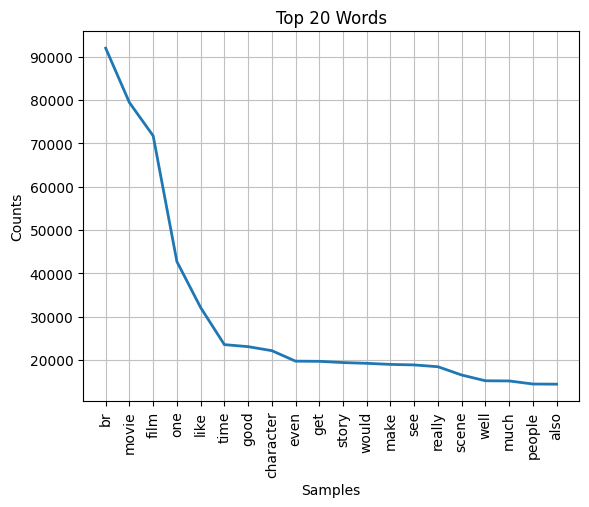

In [7]:

# Most common words
words = ' '.join(xtrain_clean.text).split()
freq_words = FreqDist(words)
freq_words.plot(20, title='Top 20 Words')

# Most common bigrams
bg = list(bigrams(words))
freq_bigrams = FreqDist(bg)
print(freq_bigrams.most_common(20))


In [8]:
pos_text = ' '.join(xtrain_clean[ytrain.label==1].text).split()
neg_text = ' '.join(xtrain_clean[ytrain.label==0].text).split()

<Axes: title={'center': 'Top 20 Words in Positive'}, xlabel='Samples', ylabel='Counts'>

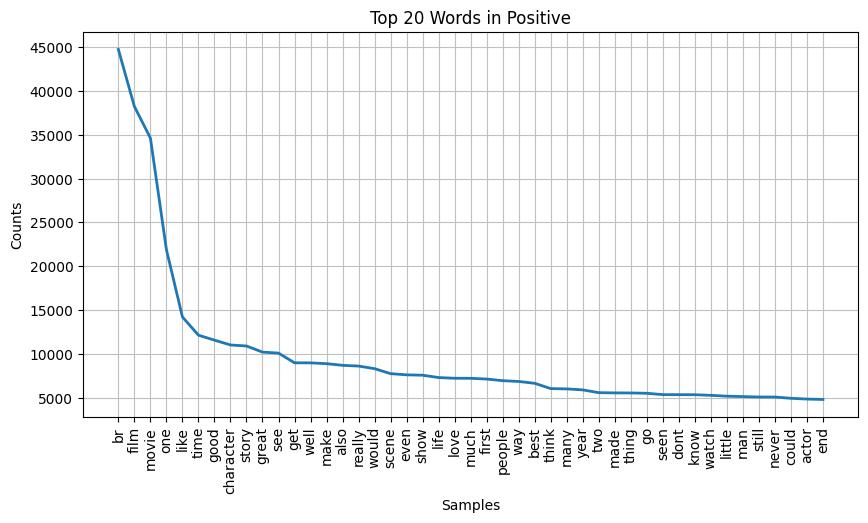

In [9]:
plt.figure(figsize=(10,5))
freq_words = FreqDist(pos_text)
freq_words.plot(45, title='Top 20 Words in Positive')

<Axes: title={'center': 'Top 20 Words in Negative'}, xlabel='Samples', ylabel='Counts'>

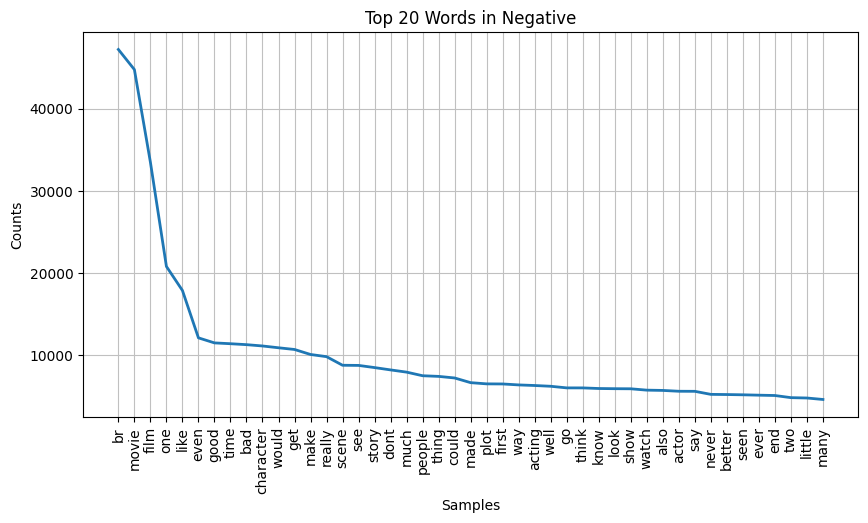

In [10]:
plt.figure(figsize=(10,5))
freq_words = FreqDist(neg_text)
freq_words.plot(45, title='Top 20 Words in Negative')

In [11]:
model1 = Sequential([
    Embedding(max_words,128 ),
    LSTM(64, return_sequences=True),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model1.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

I0000 00:00:1759040024.839986    1671 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5561 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model2 = Sequential([
    Embedding(max_words, 128),
    GRU(64, return_sequences=True),
    GRU(64, return_sequences=True),
    GRU(64),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model3 = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])

model3.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()

/home/razerash/miniconda3/lib/python3.13/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
log1 = model1.fit(xtrain_pad, ytrain,validation_data=(xval_pad, yval),epochs=5, batch_size=128)

Epoch 1/5


2025-09-28 06:13:47.990124: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91200


313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.8373 - loss: 0.3623 - val_accuracy: 0.8822 - val_loss: 0.2885
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.9084 - loss: 0.2326 - val_accuracy: 0.8794 - val_loss: 0.2874
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9331 - loss: 0.1737 - val_accuracy: 0.8796 - val_loss: 0.3224
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.9557 - loss: 0.1232 - val_accuracy: 0.8770 - val_loss: 0.3339
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9706 - loss: 0.0851 - val_accuracy: 0.8686 - val_loss: 0.4078


In [15]:
log2 = model2.fit(xtrain_pad, ytrain,validation_data=(xval_pad, yval),epochs=5, batch_size=128)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.8263 - loss: 0.3713 - val_accuracy: 0.8868 - val_loss: 0.2892
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.9151 - loss: 0.2220 - val_accuracy: 0.8800 - val_loss: 0.3030
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.9391 - loss: 0.1635 - val_accuracy: 0.8800 - val_loss: 0.3395
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.9553 - loss: 0.1219 - val_accuracy: 0.8766 - val_loss: 0.3660
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9717 - loss: 0.0838 - val_accuracy: 0.8728 - val_loss: 0.4261


In [16]:
log3 = model3.fit(xtrain_pad, ytrain,validation_data=(xval_pad, yval),epochs=5, batch_size=128)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 164ms/step - accuracy: 0.8456 - loss: 0.3513 - val_accuracy: 0.8896 - val_loss: 0.2822
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 159ms/step - accuracy: 0.9182 - loss: 0.2162 - val_accuracy: 0.8838 - val_loss: 0.2808
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 155ms/step - accuracy: 0.9402 - loss: 0.1619 - val_accuracy: 0.8810 - val_loss: 0.3467
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 164ms/step - accuracy: 0.9571 - loss: 0.1229 - val_accuracy: 0.8742 - val_loss: 0.3519
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 146ms/step - accuracy: 0.9699 - loss: 0.0906 - val_accuracy: 0.8708 - val_loss: 0.4382


In [ ]:
y_pred_prob = model.predict(xtest_pad)  # probabilities between 0 and 1
y_pred = (y_pred_prob > 0.5).astype(int)  # convert to binary labels (0 or 1)
# 3️⃣ Generate confusion matrix
cm = confusion_matrix(ytest, y_pred)

# 4️⃣ Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Sentiment Classification")
plt.show()

# CUSTOM DATA

In [17]:
custom_data=["I just finished ,honestly, I think the anime aesthetic is much better than the movie. They should have swap both director to do the production. I enjoyed the fight scenes, which were thrilling to watch, but some of the Denji with Raze moments weren't as visually pleasing as the anime. a bit sad they not being able to incorporate some of the anime's aesthetic vibes into the film. I know fan complained that the first director was too artistic and not bloody enough, but he did a great job with the color palette and create those beautiful artistic scenes. btw , I still enjoy the film, even they have change the style and focus on the violence and bloody , Lastly , Reminder  people be aware that the soundtrack could be a bit loud and the mental rock music might hurt your ear. 7/10.",

"If you’re an average viewer, I can understand why people are giving this movie 5 stars. But if you’re a little more invested in anime than the casual fan, you’ll immediately feel how much of a drag this film was. Almost the entire runtime was spent on backstory which might work well in an episodic format, but as a movie that’s supposed to stir major emotions, it just didn’t land. The constant cuts between fights were frustrating and made it hard to stay focused. It felt like the directors couldn’t decide what story they wanted to tell, jumping back and forth between multiple scenes until it all became a mess.  What a disappointment. On top of that, the movie is called Infinity Castle yet we only got through two Upper Ranks out of six present. So what was the point of that title when we didn’t even cover 30% of the arc? Should have just called this Demon Slayer: AKAZAS BACKSTORY PT 2.",

"Terrible movie, won’t be seeing the next one. Part 1 of the movie btw looks like it will have 3 parts, something they didn’t say. It sucked listening to the characters talk way too much. They got such a big head for this movie going into theatre they scuffed the whole thing. It felt like two hours of them talking and 35 minutes of action; which isn’t what it’s watched for. The writers are such crap, whoever does the English dub of this is also crap. Repeating things we’ve already seen, saying things that we’ve clearly just seen happen. Pointless, the only crew that matters in anime are the people drawing. Such a terrible movie. I won’t be seeing the next one that you are trying to make come back into our theatre, I need to be able to forward through all the dumb things you make these characters talk about. Anime is not good enough to be in theatre, it’s way too drawn out. They made it like 3 long episodes of demon slayer with minimal fighting, a lot of tiring screams, and WAY too much talking. This movie killed my ambition to care about finishing the series. It’s obvious what happens and with the way they wrote this shit. We won’t see their end until 2027. Put the rest of your shit on Crunchyroll where it belongs.",

"Worse movie I have watched in my life. Way too much backstory for a movie with what felt like every two scenes, maybe 1/2 the movie length, if I wanted backstory I would just watch the anime ughhh. And everyone gets a backstory good guys bad guys it just wouldn’t end. Movie was way too long makes lord of the rings seem short, and somehow there are two more movies to come before this is all wrapped up. 3 hours to kill two demons insane! The characters pull some move out there ass at the last minute to win like just use your ultimate attack at the beginning and save me from having to sit through this, still pissed off from having to watch this, def won’t be watching this anime.",

"Lowkey I paid 16.8 dollars for this movie and all i got was another one of akazas back story. So disappointed when I waited for this movie for like 1 year or 2... besides they already made like a whole episode of akazas backstory and this is what 60% of the movie was. His BackStory. 30%fighting 10%thrill 10% sadness. And 50% back story. Also the ending gave us more information of the movie then anything else. More exciment and more blood... if they made part two I will first look at the review and then wait for it to come out in crunchyroll or netflix... cause this was just a waste of my time when they could have made an episode about this first. I was waiting for blood violence gore and excitement but all I got was a back story that  explains 3%of the movie. This shouldn't have been called infinity castle. It should have been called akazas backstory.",

"I expected more from such a highly rated show. The over explanatory nature of everything from fight scenes to the backstory of the characters makes any emotion disappear. I am backed by the 2 person snoring next to me for 30mins and the numerous people who decided that one of the character’s backstory has been repeated enough times that they should just go and text someone, because would you have guessed that after 20mins of typing and when they finally looked up, they were still looking at the same story.  The graphics and LiSA’s impeccable singing can’t save it.  Anyone giving high rating and mention graphics as the first point is just giving high rating for graphics.",

"Just watched Demon Slayer: Infinity Castle and it was incredible. The movie is long—about 2.5 hours—but it kept me hooked the whole time. The animation was absolutely stunning, with the Infinity Castle’s shifting design making every scene feel surreal and larger-than-life. The fights were some of the best in the series, intense yet beautifully choreographed, and the emotional weight behind them really hit hard.   Akaza’s backstory stood out to me, adding depth to his character and making him more than just a villain, while Shinobu’s fight with Doma was both heartbreaking and epic. The pacing did slow down a bit with all the flashbacks, but honestly I felt they added to the story rather than dragging it down. Overall, it felt like a true cinematic experience—packed with action, emotion, and breathtaking visuals. For me, it’s a solid 9/10 and an amazing start to the final arc.",

"As a long time Overlord fan, having bought and read several of the novels and watched the show up to the end of Season 4, all I can say is that I'm completely disappointed. Without any potential spoilers, everything from the action to the character development to the political intrigue is lackluster, without any sort of tension or suspense and fails to advance the plot in any meaningful way. A boring slogfest from start to finish with zero payoff. Do yourself a favor and save your time and money on this sadly disappointing adaptation.",

"Falls short of my expectations set by the series. While the film offers some visually impressive moments, the pacing is sluggish, and it spends too much time on long dialogue rather than meaningful character development. The story feels fragmented, leaving me disconnected from the story. Additionally, the action sequences lack the intensity and creativity the series is known for. Overall, it feels more like a long, disjointed episode rather than a full-fledged movie, making it a disappointing addition for me.",

"I loved this movie. I own the 2 books in all forms, Audible, Kindle, Hard cover. I fell in love with this story and I think it can stand all on it's own. This movie felt the same. It stands on its own and it is very enjoyable. I definitely recommend giving it a watch! There were a number of changes given the film covers 2 books. The pieces that they cut out felt reasonably thought out. The balance between time crunch and narrative necessity is well done. I would have liked to see a bit more of book 1 and of Ainz fights. Specifically with Grand King and the Evil  Lord with Maids. However the perspective felt like Neia's and looking at it that way does make it seem like they handled those moments correctly for a film adaptation. 5/5 10/10 from an admitted super fan. I am going to see it again before it leaves theaters and I hope you go see it too."

]

In [18]:
labels=pd.DataFrame([1,0,0,0,0,0,1,0,0,1])

In [19]:
test_clean = [clean_text(r) for r in custom_data]
test_seq = tokenizer.texts_to_sequences(test_clean)
test_pad = pad_sequences(test_seq, maxlen=max_len)

In [20]:
model1.evaluate(test_pad,labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 1.0000 - loss: 0.0857


[0.0856827050447464, 1.0]

In [21]:
model2.evaluate(test_pad,labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 0.0691


[0.06906300783157349, 1.0]

In [22]:
model3.evaluate(test_pad,labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.8000 - loss: 0.4482


[0.448164165019989, 0.800000011920929]

# TEST DATA

In [23]:
xtest_clean = xtest.map(clean_text)
xtest_seq = tokenizer.texts_to_sequences(xtest_clean.text)
xtest_pad = pad_sequences(xtest_seq, maxlen=max_len)

In [24]:
model1.evaluate(xtest_pad,ytest)

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8692 - loss: 0.3912


[0.391193687915802, 0.8691999912261963]

In [25]:
model2.evaluate(xtest_pad,ytest)

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.8762 - loss: 0.4072


[0.40715500712394714, 0.8762000203132629]

In [26]:
model3.evaluate(xtest_pad,ytest)

157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.8786 - loss: 0.4171


[0.4171237647533417, 0.878600001335144]